# Shortest Paths and Shortest Tour

**Goal**: Learn how to compute the shortest path between two vertices in a graph and how to find the shortest tour visiting all vertices of a graph.

Imagine you and your friends decided to go on a road trip across Europe and visit the capitals of Germany, Switzerland, Belgium, Romania, and Hungary. The following table shows the travel time by car between the capitals.

<table class="center">
    <tr>
        <th style="text-align:center">Origin </th>
        <th style="text-align:center">Destination </th>
        <th style="text-align:center">Travel time (hh:mm) </th>
    </tr>
    <tr>
        <td style="text-align:center">Berlin</td>
        <td style="text-align:center">Bern</td>
        <td style="text-align:center">09:44</td>
    </tr>
    <tr>
        <td style="text-align:center">Berlin</td>
        <td style="text-align:center">Brussels</td>
        <td style="text-align:center">07:51</td>
    </tr>
    <tr>
        <td style="text-align:center">Berlin</td>
        <td style="text-align:center">Bucharest</td>
        <td style="text-align:center">18:00</td>
    </tr>
    <tr>
        <td style="text-align:center">Berlin</td>
        <td style="text-align:center">Budapest</td>
        <td style="text-align:center">08:51</td>
    </tr>
    <tr>
        <td style="text-align:center">Bern</td>
        <td style="text-align:center">Brussels</td>
        <td style="text-align:center">06:45</td>
    </tr>
    <tr>
        <td style="text-align:center">Bern</td>
        <td style="text-align:center">Budapest</td>
        <td style="text-align:center">11:21</td>
    </tr>
    <tr>
        <td style="text-align:center">Brussels</td>
        <td style="text-align:center">Budapest</td>
        <td style="text-align:center">13:46</td>
    </tr>
    <tr>
        <td style="text-align:center">Bucharest</td>
        <td style="text-align:center">Budapest</td>
        <td style="text-align:center">09:22</td>
    </tr>
</table>

## Task 1: Drawing the graph

**Your task:** Draw the resulting graph with the cities as nodes and the travel times as edge weights.

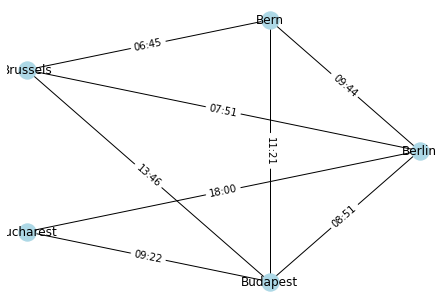

In [1]:
# Load networkx
import networkx as nx
#Command to draw in jupyter notebook
%matplotlib inline

#Create an empty graph
G = nx.Graph()

# Add the nodes
G.add_nodes_from([("Berlin"),
                  ("Bern"),
                  ("Brussels"),
                  ("Bucharest"),
                  ("Budapest")])

# Add the edges (travel_time in minutes)
G.add_edges_from([("Berlin", "Bern", {"travel_time": "09:44"}),
                  ("Berlin", "Brussels", {"travel_time": "07:51"}),
                  ("Berlin", "Bucharest", {"travel_time": "18:00"}),
                  ("Berlin", "Budapest", {"travel_time": "08:51"}),
                  ("Bern", "Brussels", {"travel_time": "06:45"}),
                  ("Bern", "Budapest", {"travel_time": "11:21"}),
                  ("Brussels", "Budapest", {"travel_time": "13:46"}),
                  ("Bucharest", "Budapest", {"travel_time": "09:22"})])

# Draw the weighted graph
# This command brings the nodes in a circle, which makes it easier to look at
node_pos = nx.circular_layout(G)
nx.draw(G, with_labels=True,pos=node_pos, node_color = 'lightblue')
edge_draw = nx.draw_networkx_edge_labels(G, pos = node_pos, 
                                         edge_labels = nx.get_edge_attributes(G, 'travel_time'))

## Taks 2: Shortest Path

**Your task:** For each pair of capitals, compute the length of a shortest path between them, i.e., the route from one capital to another with the smallest travel time.

**Optional task**: In addition to the shortest path length, print out a shortest path.

In [2]:
#we first need to convert our travel times into a format
for edge in G.edges():
    string = (G[edge[0]][edge[1]]["travel_time"]).split(":")
    t=(60*int(string[0]) + int(string[1]))
    G.add_edge(edge[0],edge[1],time=t)

#we first make an iterable list of our nodes
nodes = list(G.nodes())

#we want to compute the shortest path between all pairs
for i in range(len(nodes)):
    for j in range(i+1,len(nodes)):
        #compute the shortes time using the shortest_path_length and as edge-weights we use 'time'
        t = nx.shortest_path_length(G,source=nodes[i],target=nodes[j],weight='time')
        #this function gives us the a list of our stops (nodes) from source to target
        path = nx.shortest_path(G,source=nodes[i],target=nodes[j],weight='time')
        #printing our solutions in a somewhat beautiful way.
        print('It takes {}h{}m to get from {} to {}'.format(int(t/60), t%60, nodes[i], nodes[j]))
        stops = 'Your path is: '
        for k in range(0,len(path)):
            stops += '{}-> '.format(path[k])
        print(stops[:-3] + '.')
        

It takes 9h44m to get from Berlin to Bern
Your path is: Berlin-> Bern.
It takes 7h51m to get from Berlin to Brussels
Your path is: Berlin-> Brussels.
It takes 18h0m to get from Berlin to Bucharest
Your path is: Berlin-> Bucharest.
It takes 8h51m to get from Berlin to Budapest
Your path is: Berlin-> Budapest.
It takes 6h45m to get from Bern to Brussels
Your path is: Bern-> Brussels.
It takes 20h43m to get from Bern to Bucharest
Your path is: Bern-> Budapest-> Bucharest.
It takes 11h21m to get from Bern to Budapest
Your path is: Bern-> Budapest.
It takes 23h8m to get from Brussels to Bucharest
Your path is: Brussels-> Budapest-> Bucharest.
It takes 13h46m to get from Brussels to Budapest
Your path is: Brussels-> Budapest.
It takes 9h22m to get from Bucharest to Budapest
Your path is: Bucharest-> Budapest.


## Task 3: Shortest Tour

**Your task:** Find a a shortest Hamiltonian cycle, i.e., a path that starts and ends at the same capital and visits every capital exactly once. What is the complexity of your algorithm (given an $n$-vertex graph)?

*Hint:* How can you describe all sequences of vertices that can potentially form a Hamiltonian cycle?

### Solution

The idea is to consider all permutations of vertices and then for every permutation that forms a cycle compare its length to the shortest cycle seen so far and update the best solution if needed. The complexity of this algorithm is $O(n \cdot n!)$.

The problem of finding a shortest Hamiltonian cycle is known as the [travelling salesman problem](https://en.wikipedia.org/wiki/Travelling_salesman_problem).

In [3]:
#Is used to make an iterable for all permutations of our 5 cities
import itertools

#maximal value for integers, as we want to minimize we start with a large number
time=9223372036854775807

#we make our nodes an itertools-iterable, we do this as itertools has an easy way to go through all permutations
#of a list
iterable = iter(nodes)

#We will save a list of cities (nodes) in here that will at the end be our solution
path=0

#here we check if all edges in our permutation exists
def checkIfAllEdgesExist(pathway):
    for j in range(len(pathway)):
        #if two nodes aren't directly connected in our path we will reject the permutation, as we would otherwise
        #visit one (or multiple) city [except start/finish] more than once and we don't want that.
        if (not G.has_edge(pathway[j], pathway[(j+1)%5])):
            return False
    return True

#We will go through all permutations for our cities
for perm in itertools.permutations(iterable):
    #We want to make sure that we only visit each city once, more on that in the function above
    if checkIfAllEdgesExist(perm):
        #we calculate the time it takes to travel our current permutation. For that we add all weight (time) of the
        #edges we go through.
        t_curr=0
        for i in range(len(perm)):
            t_curr += G.get_edge_data(perm[i],perm[(i+1)%5])['time']
        #if it is faster to use our current permutation that it was to use all the other permutations before, we
        #we update our current fastest time and our best path
        if t_curr<time:
            path=perm
            time=t_curr

#printing our solutions in a somewhat beautiful way.  
print('The shortest tour through all cities is starting and ending in {} \nand going via {}, {}, {} and {}'
      .format(path[0],path[1],path[2],path[3],path[4]))
print('It will take you {} hours {} minutes of non-stop driving'.format(int(time/60), time%60))

The shortest tour through all cities is starting and ending in Berlin 
and going via Brussels, Bern, Budapest and Bucharest
It will take you 53 hours 19 minutes of non-stop driving
